# GWAS plot example

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("G500_activity_specificity_position_df.csv")
df.head()

,TargetSequence,WindowChromosome,Position,Site_SubstitutionsOnly_Sequence,Site_SubstitutionsOnly_NumSubstitutions,bi_sum_mi,total_read_counts,specificity_ratio,ProtospacerSequence,Coverage,normalized_activity,Chromosome,Start,PlotPosition
0,GACTCGTCCTCGGCGCCGTTNGG,chr2,25161398,GACTCGTCCTCGGCGCCGTTAGG,0.0,1872,1872,1.0,GACTCGTCCTCGGCGCCGTT,6525.0,0.286897,chr2,248956422,274117820
1,GCGGCTCCTACCACAAAATCNGG,chr11,70407379,GCGGCTCCTACCACAAAATCAGG,0.0,91,91,1.0,GCGGCTCCTACCACAAAATC,5751.0,0.015823,chr11,1808681051,1879088430
2,GACCTGTTTGGGCAGGCGCCNGG,chr19,11514082,GACCTGTTTGGGCAGGCGCCTGG,0.0,85,85,1.0,GACCTGTTTGGGCAGGCGCC,7336.0,0.011587,chr19,2654411288,2665925370
3,GTACCGCCCGCGGGAGTACCNGG,chr4,991502,GTACCGCCCGCGGGAGTACCTGG,0.0,648,648,1.0,GTACCGCCCGCGGGAGTACC,6440.0,0.100621,chr4,689445510,690437012
4,GATGAGGTTAGCCACGTTCCNGG,chr1,181089696,GATGAGGTTAGCCACGTTCCCGG,0.0,477,477,1.0,GATGAGGTTAGCCACGTTCC,9023.0,0.052865,chr1,0,181089696


In [3]:

def liyc_GWAS_plot(df, chrom="#CHROM", pos="POS", pv="P", snp="ID", logp=True, ax=None,ymax=None,
                  marker=".", color="#3B5488,#53BBD5", alpha=0.8,size=None,
                  title=None, xlabel="Chromosome", ylabel=r"$-log_{10}{(P)}$",
                  xtick_label_set=None, CHR=None, xticklabel_kws=None,
                  suggestiveline=1e-5, genomewideline=5e-8, sign_line_cols="#D62728,#2CA02C", hline_kws=None,
                  sign_marker_p=None, sign_marker_color="r",outFile=None,
                  is_annotate_topsnp=False, highlight_other_SNPs_indcs=None,
                  highlight_other_SNPs_color="r", highlight_other_SNPs_kwargs=None,
                  text_kws=None, ld_block_size=50000, figsize=(16,4),**kwargs):
    """Creates a manhattan plot from a DataFrame.
    Parameters
    ----------
    data : DataFrame.
        A DataFrame with columns "#CHROM," "POS," "P," and optionally, "SNP."
    chrom : string, default is "#CHROM", optional
        A string denoting the column name for chromosome. Defaults to be PLINK2.x's "#CHROM".
        Said column must be a character.
    pos : string, default is "POS", optional.
        A string denoting the column name for chromosomal position. Default to PLINK2.x's "POS".
        Said column must be numeric.
    pv : string, default is "P", optional.
        A string denoting the column name for chromosomal p-value. Default to PLINK2.x's "P".
        Said column must be float type.
    snp : string, default is "ID", optional.
        A string denoting the column name for the SNP name (rs number) or the column which you want to
        represent the variants. Default to PLINK2.x's "P". Said column should be a character.
    logp : bool, optional
        If TRUE, the -log10 of the p-value is plotted. It isn't very useful
        to plot raw p-values, but plotting the raw value could be useful for
        other genome-wide plots, for example, peak heights, bayes factors, test
        statistics, other "scores," etc. default: True
    ax : matplotlib axis, optional
        Axis to plot on, otherwise uses current axis.
    marker : matplotlib markers for scatter plot, default is "o", optional
    color : matplotlib color, optional, default: color_palette('colorful', 4)
        Color used for the plot elements. Could hex-code or rgb,
        e.g: '#3B5488,#53BBD5' or 'rb'
    alpha : float scalar, default is 0.8, optional
        The alpha blending value, between 0(transparent) and 1(opaque)
    title : string, or None, optional
        Set the title of the current plot.
    xlabel: string, optional
        Set the x axis label of the current axis.
    ylabel: string, optional
        Set the y axis label of the current axis.
    xtick_label_set : a set. optional
        Set the current x axis ticks of the current axis.
    CHR : string, or None, optional
        Select a specific chromosome to plot. And the x-axis will be the
        position of this chromosome instead of the chromosome id.
        CAUTION: this parameter could not be used with ``xtick_label_set``
                 together.
    xticklabel_kws : key, value pairings, or None, optional
        Other keyword arguments are passed to set xtick labels in
        maplotlib.axis.Axes.set_xticklabels.
    suggestiveline : float or None, default is 1e-5, optional
        Where to draw a suggestive ax.axhline. Set None to be disable.
    genomewideline : float or None, default is 5e-8
        Where to draw a genome-wide significant ax.axhline. Set None to be disable.
    sign_line_cols : matplotlib color, default: "#D62728,#2CA02C", optional.
        Color used for ``suggestiveline`` and ``genomewideline``.
        Could be hex-code or rgb, e.g: "#D62728,#2CA02C" or 'rb'
    hline_kws : key, value pairings, or None, optional
        keyword arguments for plotting ax.axhline(``suggestiveline`` and ``genomewideline``)
        except the "color" key-pair.
    sign_marker_p : float or None, default None, optional.
        A P-value threshold (suggestive to be 1e-6) for marking the significant SNP sites.
    sign_marker_color : matplotlib color, default: "r", optional.
        Define a color code for significant SNP sites.
    is_annotate_topsnp : boolean, default is False, optional.
        Annotate the top SNP or not for the significant locus.
    highlight_other_SNPs_indcs : iterable, or None, optional
        Numerical indices of other SNPs (i.e. not the top SNP) to highlight.
    highlight_other_SNPs_color : matplotlib color, default: "r", optional.
        Define a color code for other highlighted SNP sites.
    highlight_other_SNPs_kwargs=None : Dict, or None, optional
        Dict of keyword arguments passed to the command highlighting the other SNPs.
    text_kws: key, value pairings, or None, optional
        keyword arguments for plotting in`` matplotlib.axes.Axes.text(x, y, s, fontdict=None, **kwargs)``
    ld_block_size : integer, default is 50000, optional
        Set the size of LD block which for finding top SNP. And the top SNP's annotation represent the block.
    kwargs : key, value pairings, optional
        Other keyword arguments are passed to ``plt.scatter()`` or
        ``plt.vlines()`` (in matplotlib.pyplot) depending on whether
        a scatter or line plot is being drawn.
    Returns
    -------
    ax : matplotlib Axes
        Axes object with the manhattanplot.
    Notes
    -----
    1. This plot function is not just suit for GWAS manhattan plot,
       it could also be used for any input data which have [chromo-
       some, position and p-value] dataframe.
    2. The right and top spines of the plot have been set to be
       invisible by hand.
    Examples
    --------
    Plot a basic manhattan plot from PLINK2.x association output and reture the figure:
    .. plot::
        :context: close-figs
        >>> import pandas as pd
        >>> from qmplot import manhattanplot
        >>> df = pd.read_table("tests/data/gwas_plink_result.tsv", sep="\t")
        >>> df = df.dropna(how="any", axis=0)  # clean data
        >>> ax = manhattanplot(data=df)
    Plot a basic manhattan plot with horizontal xtick labels and save the plot
    to a file name "manhattan.png":
    .. plot::
        :context: close-figs
        >>> xtick = set(['chr' + i for i in list(map(str, range(1, 10))) + ['11', '13', '15', '18', '21', 'X']])
        >>> manhattanplot(data=df, xlabel="Chromosome", ylabel=r"$-log_{10}{(P)}$",
        ...               xtick_label_set=xtick)
        >>> plt.savefig("manhattan.png")
    Add a horizontal at y position=3 line with linestyle="--" and lingwidth=1.3
    across the axis:
    .. plot::
        :context: close-figs
        >>> manhattanplot(data=df,
        ...               hline_kws={"linestyle": "--", "lw": 1.3},
        ...               xlabel="Chromosome",
        ...               ylabel=r"$-log_{10}{(P)}$",
        ...               xtick_label_set = xtick)
    Rotate the x-axis ticklabel by setting ``xticklabel_kws``:
    .. plot::
        :context: close-figs
        >>> manhattanplot(data=df,
        ...               hline_kws={"linestyle": "--", "lw": 1.3},
        ...               xlabel="Chromosome",
        ...               ylabel=r"$-log_{10}{(P)}$",
        ...               xticklabel_kws={"rotation": "vertical"})
    Plot a better one with genome-wide significant mark and annotate the Top SNP and save
    the figure to "output_manhattan_plot.png":
    .. plot::
        :context: close-figs
        >>> fig, ax = plt.subplots(figsize=(12, 4), facecolor="w", edgecolor="k")  # define a plot
        >>> manhattanplot(data=df,
        ...               marker=".",
        ...               sign_marker_p=1e-6,  # Genome wide significant p-value
        ...               sign_marker_color="r",
        ...               snp="ID",
        ...               title="Test",
        ...               xtick_label_set=xtick,
        ...               xlabel="Chromosome",
        ...               ylabel=r"$-log_{10}{(P)}$",
        ...               sign_line_cols=["#D62728", "#2CA02C"],
        ...               hline_kws={"linestyle": "--", "lw": 1.3},
        ...               is_annotate_topsnp=True,
        ...               ld_block_size=50000,  # 50000 bp
        ...               text_kws={"fontsize": 12,  # The fontsize of annotate text
        ...                         "arrowprops": dict(arrowstyle="-", color="k", alpha=0.6)},
        ...               ax=ax)
        >>> plt.savefig("output_manhattan_plot.png", dpi=300)
    """
    from pandas import DataFrame
    import matplotlib.pyplot as plt
    from itertools import cycle
    R_color=['#F8766D','#ED813E','#DE8C00','#CD9600','#B79F00','#9DA700','#7CAE00','#49B500','#00BA38','#00BE67','#00C08B','#00C1A9','#00BFC4','#00BBDC','#00B4F0','#00A9FF','#619CFF','#9F8CFF','#C77CFF','#E36EF6','#F564E3','#FF61CC','#FF64B0','#FF6C91']
    data = df.copy()
    if not isinstance(data, DataFrame):
        raise ValueError("[ERROR] Input data must be a pandas.DataFrame.")
    if chrom not in data:
        raise ValueError("[ERROR] Column \"%s\" not found!" % chrom)
    if pos not in data:
        raise ValueError("[ERROR] Column \"%s\" not found!" % pos)
    if pv not in data:
        raise ValueError("[ERROR] Column \"%s\" not found!" % pv)
    if is_annotate_topsnp and (snp not in data):
        raise ValueError("[ERROR] You're trying to annotate a set of SNPs but "
                         "NO SNP \"%s\" column found!" % snp)
    if CHR is not None and xtick_label_set is not None:
        raise ValueError("[ERROR] ``CHR`` and ``xtick_label_set`` can't be set simultaneously.")

    # sort data
    data[[chrom]] = data[[chrom]].astype(str)  # make sure all the chromosome id are character.
    chr=["chr1","chr2","chr3","chr4","chr5","chr6","chr7","chr8","chr9","chr10","chr11","chr12","chr13","chr14","chr15","chr16","chr17","chr18","chr19","chr20","chr21","chr22","chrX","chrY"]
    chr_dict = {}
    for i in range(len(chr)):
        chr_dict[chr[i]] = i
    data['chr_order'] = data["Chromosome"].map(chr_dict)
    data = data[~data.chr_order.isnull()]
    data = data.sort_values(["chr_order",pos])
    data = data.fillna(0)
    data[chrom] = data[chrom].apply(lambda x:x.replace("chr",""))

    # Draw the plot and return the Axes
    # if ax is None:
        # ax = plt.gca()
    fig, ax = plt.subplots(figsize=figsize, facecolor="w", edgecolor="k")  # default

    if xticklabel_kws is None:
        xticklabel_kws = {}
    if hline_kws is None:
        hline_kws = {}
    if text_kws is None:
        text_kws = {}

    if "," in color:
        color = color.split(",")
    colors = cycle(R_color)

    last_xpos = 0
    xs_by_id = []  # use for collecting chromosome's position on x-axis
    x, y, c,s = [], [], [],[]
    sign_snp_sites = []
    for seqid, group_data in data.groupby(by=chrom, sort=False):  # keep the raw order of chromosome

        if (CHR is not None) and (seqid != CHR):
            continue

        color = next(colors)
        # display(group_data)
        for i, (site, p_value,r_size) in enumerate(zip(group_data[pos], group_data[pv],group_data[size])):
            if p_value == 0:
                p_value = 1e-300  # set it to a very small value if p-value is 0.

            y_value = -np.log10(p_value) if logp else p_value
            x.append(last_xpos + site)
            y.append(y_value)
            s.append((r_size+0.1)*200)
            c.append(sign_marker_color if ((sign_marker_p is not None) and (p_value <= sign_marker_p)) else color)
            if (sign_marker_p is not None) and (p_value <= sign_marker_p):
                snp_id = group_data[snp].iloc[i]
                sign_snp_sites.append([last_xpos + site, y_value, snp_id])  # x_pos, y_value, text

        # ``xs_by_id`` is for setting up positions and ticks. Ticks should
        # be placed in the middle of a chromosome. The a new pos column is
        # added that keeps a running sum of the positions of each successive
        # chromsome.
        xs_by_id.append([seqid, last_xpos + (group_data[pos].iloc[0] + group_data[pos].iloc[-1]) / 2])
        last_xpos = x[-1]  # keep track so that chromosome will not overlap in the plot.

    if not x:
        raise ValueError("zero-size array to reduction operation minimum which has no "
                         "identity. This could be caused by zero-size array of ``x`` "
                         "in the ``manhattanplot(...)`` function.")

    if "marker" not in kwargs:
        kwargs["marker"] = marker
    # return x,y,c
    # plot the main manhattan dot plot
    # ax.bar(x, y, color=c, alpha=alpha, edgecolors="none", **kwargs)
    # sc=ax.scatter(x, y, s=s,edgecolors="none")
    # sc=ax.scatter(x, y, c=c, s=s,alpha=alpha,edgecolors="none",label=s, **kwargs)
    # you may want to modify this
    sc=ax.scatter(x, y, c=c, s=s,alpha=alpha,label=s, **kwargs,linewidths=0.5,edgecolors="Black")
    # legend1=ax.legend(*sc.legend_elements())
    # ax.add_artist(legend1)

    # print (xs_by_id)
    ax.set_xticks([v for c, v in xs_by_id])
    ax.set_xticklabels([c for c, v in xs_by_id],rotation=0, **xticklabel_kws)


    # you may want to modify this
    ax.set_xlim(-20000000, x[-1]+20000000)
    ax.set_ylim(ymin=0, ymax=1.1)

    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    handles, labels = sc.legend_elements(prop="sizes", alpha=0.6)
    # print (handles)
    # print (labels)
    legend2 = ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), title=size)
    if outFile:
        plt.savefig(outFile,bbox_inches='tight')    
    return ax,x,y,c,s,xs_by_id


# manhattanplot(data=df,chrom="chr",pos="start",pv="CRL2458_S1_percentage_indels",snp="name",logp=False,ymax=1)

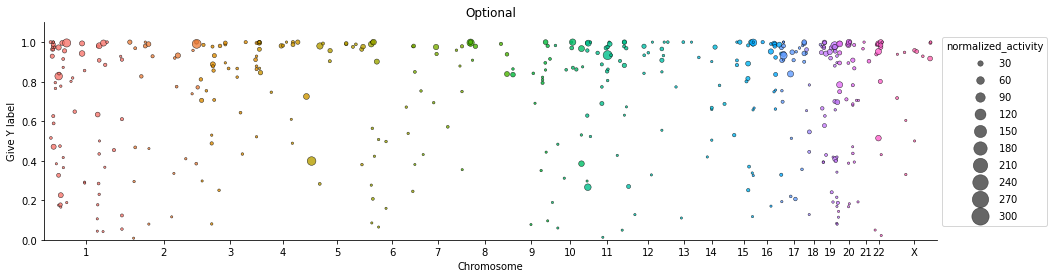

In [6]:
# required arguments
# first argument is always the input dataframe, no need to give data=df, just df
# then users need to specify the column names for:
# `chrom`: chrosome names, need to be chr1, chr2, not 1 or 2
# `pos`: genomic positions
# `pv`: values to plot on Y-axis, you need to specify logp=False if this value should not be log transformed
# `size`: values to plot as the dot size, the dot size is defined as (r_size+0.1)*200, you may want to change it
# The following are optional:
# title
# ylabel
# xlabel
# outFile: if provided, the plot will be saved
a=liyc_GWAS_plot(df,chrom="Chromosome",pos="Position",pv="specificity_ratio",size="normalized_activity",
                logp=False,title="Optional",ylabel="Give Y label",xlabel="Chromosome",outFile="outFile.pdf")